## Introduction

In this notebook we will try to collect some Cityscoot fleet data

## What is Cityscoot ?

Cityscoot is a service that offers access to electric mopeds in some european cities like : Paris, Nice, Milan and Turin

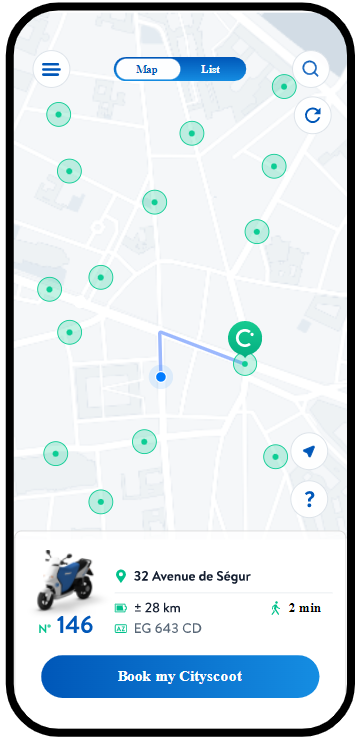

Users can consult the locations of the available scooters on an application on Google Play and the AppStore

## How to get the data

In order to collect the data that we are going to work on, we should get access to the Cityscoot API. By making some requests capturing while using the application you can get the link to this API and its token. You can use a tool called Burp Suite in order to intercept the requests made by the application, both the compute rand the phone should be connected to the same Wifi

## Cityscoot API

In [2]:
import requests

url = "https://publicapi.cityscoot.eu/api/v2/scooters/public/city/4?"

headers = {
'accept': 'application/json',
'accept-encoding': 'gzip',
'connection':'Keep-Alive',
'content-type':'application/json',
'host':'publicapi.cityscoot.eu',
'x-user-geolocation':'{"latitude":48.87595487106672,"longitude":2.352376509130001}'
  }

response = requests.request("GET", url, headers=headers)



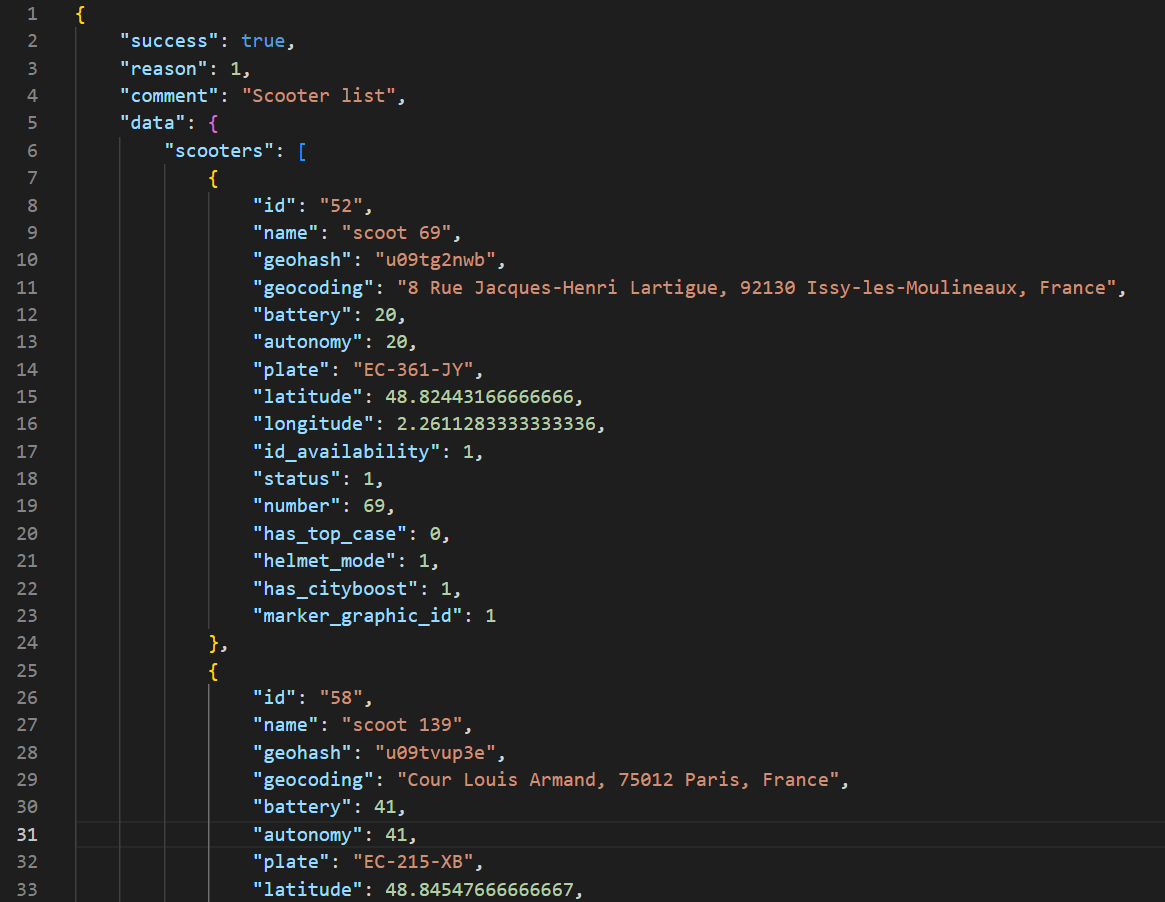

## Collecting the data

Now that we have access to Cityscoot public API, we are going to automate the collection of the data about the available fleet.

In [ ]:
import csv
import requests
import json
import time
from datetime import datetime


def getData():
    headers = {
        'accept': 'application/json',
        'accept-encoding': 'gzip',
        'connection':'Keep-Alive',
        'content-type':'application/json',
        'host':'publicapi.cityscoot.eu',
        'x-user-geolocation':'{"latitude":48.87595487106672,"longitude":2.352376509130001}'
    }
    try:
        response = requests.get(
            'https://publicapi.cityscoot.eu/api/v2/scooters/public/city/4?',
            headers=headers)
        return response
    except:
        print("ok")


starttime = time.time()
while True:
    timestamp = time.time()
    dt_object = datetime.fromtimestamp(timestamp)
    fileName = "Cityscoot_" + dt_object.strftime("%d-%m-%Y_%H%M") + ".csv"
    f = open(fileName, "a")
    f.write("date;id;latitude;longitude;battery;id_availability\n")
    f.close()

    response = getData()

    if response.status_code == 200:
        print(response.status_code)
        responseJson = response.json()
        # print(responseJson)
        scooters = responseJson["data"]["scooters"]
        for thisScooter in scooters:
            #print(thisScooter)
            scooterId = thisScooter["id"]
            latitude = thisScooter["latitude"]
            longitude = thisScooter["longitude"]
            battery = thisScooter["battery"]
            id_availability = thisScooter["id_availability"]
            line = dt_object.strftime("%Y-%m-%d %H:%M:%S") + ";" + str(scooterId) + ";" + str(latitude) + ";" + str(longitude) + ";" + str(battery) +  ";" + str(id_availability) + "\n"
            #print(line)
            f = open(fileName, "a")
            f.write(line)
            f.close()
        time.sleep(600.0 - ((time.time() - starttime) % 600.0))

200
